In [1]:
# Problem : Medical insurance prediction 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as mns

In [3]:
df = pd.read_csv('insurance.csv')

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
# No missing values

In [7]:
df = df[["age", "sex","bmi","children","smoker","charges"]] # Drop region column

In [8]:
df.head()

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520


<AxesSubplot:xlabel='age'>

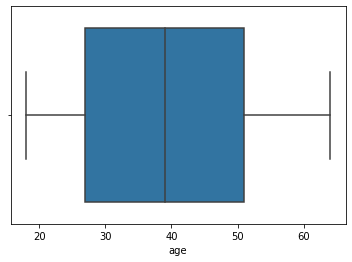

In [9]:
sns.boxplot(x=df["age"])

<AxesSubplot:xlabel='bmi'>

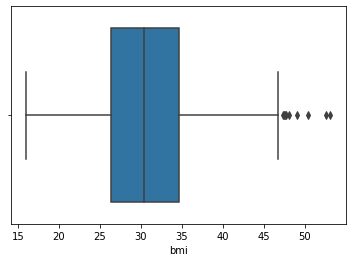

In [10]:
sns.boxplot(x=df["bmi"])

<AxesSubplot:xlabel='children'>

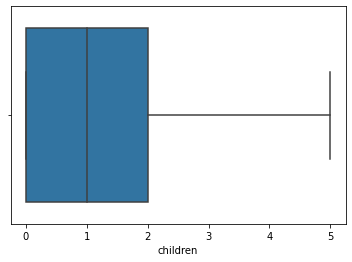

In [11]:
sns.boxplot(x=df["children"])

<AxesSubplot:xlabel='charges'>

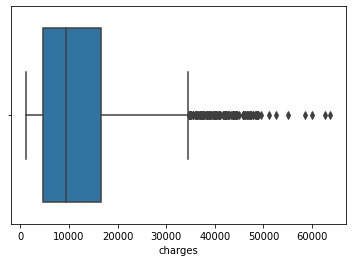

In [12]:
sns.boxplot(x=df["charges"])

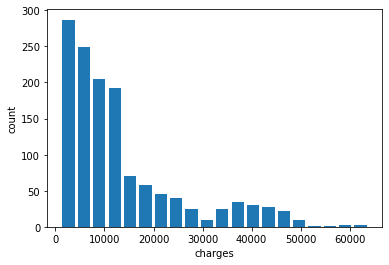

In [13]:
plt.hist(df.charges,bins=20,rwidth=0.8)
plt.xlabel('charges')
plt.ylabel('count')
plt.show()

In [14]:
X = df.drop(columns='charges')
y = df['charges']

In [15]:
from sklearn.linear_model import LinearRegression ,Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [17]:
column_trans = make_column_transformer((OneHotEncoder(sparse=False),['sex','smoker']),remainder='passthrough')

In [18]:
re = LinearRegression(normalize=True)

In [19]:
scaler = StandardScaler()

In [20]:
pipe = make_pipeline(column_trans,scaler,re)

In [21]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['sex', 'smoker'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression(normalize=True))])

In [22]:
y_pred = pipe.predict(X_test)

In [23]:
linear_score = r2_score(y_test, y_pred)
linear_score

0.7959338977456588

In [24]:
# Lasso regression

In [25]:
lasso = Lasso()

In [26]:
la_pipe = make_pipeline(column_trans,scaler,lasso)

In [27]:
la_pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['sex', 'smoker'])])),
                ('standardscaler', StandardScaler()), ('lasso', Lasso())])

In [28]:
y_lasso = la_pipe.predict(X_test)

In [29]:
lasso_score = r2_score(y_test,y_lasso)
lasso_score

0.7978490866753515

In [30]:
# Ridge Regression

In [31]:
ridge = Ridge()

In [32]:
re_pipe = make_pipeline(column_trans,scaler,ridge)

In [33]:
re_pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['sex', 'smoker'])])),
                ('standardscaler', StandardScaler()), ('ridge', Ridge())])

In [34]:
y_ridge = re_pipe.predict(X_test)

In [35]:
ridge_score = r2_score(y_test,y_ridge)
ridge_score

0.7978266206685127

In [36]:
print('Linear Regression : ',linear_score)
print('Linear Regression : ',lasso_score)
print('Linear Regression : ',ridge_score)

Linear Regression :  0.7959338977456588
Linear Regression :  0.7978490866753515
Linear Regression :  0.7978266206685127


In [37]:
import pickle

In [39]:
re_pipe.predict(pd.DataFrame([[18,'male',33.770,1,'no']],columns=['age','sex','bmi','children','smoker']))

array([3932.14241203])

In [41]:
la_pipe.predict(pd.DataFrame([[23,'male',34.400,0,'no']],columns=['age','sex','bmi','children','smoker']))

array([4974.11968952])

In [43]:
pipe.predict(pd.DataFrame([[18,'male',33.770,1,'no']],columns=['age','sex','bmi','children','smoker']))

array([3949.23768805])